## Data Loading And Preprocessing

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("/kaggle/input/employee-performance-and-salary-dataset/Employe_Performance_dataset.csv")

In [27]:
df.sample(5)

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
723,724,Keith Johnson,49,Male,IT,7298,2020-09-21,NaN,18,Inactive,Los Angeles,Evening
144,145,Kimberly Murphy,25,Other,HR,3003,2019-05-14,1.0,19,Active,New York,Morning
76,77,Victor Nelson,47,Female,Sales,2025,2015-05-14,1.0,5,Active,New York,Night
604,605,Erin Phillips,65,Female,Sales,8054,2022-01-04,2.0,9,Active,New York,Night
306,307,Henry Harmon,57,Male,HR,9161,2022-08-02,NaN,5,Inactive,Los Angeles,Morning


In [28]:
df.shape

(1000, 12)

In [29]:
print(df.isna().sum())
print(df['ID'].duplicated().sum())

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64
0


In [30]:
df.dtypes

ID                     int64
Name                  object
Age                    int64
Gender                object
Department            object
Salary                 int64
Joining Date          object
Performance Score    float64
Experience             int64
Status                object
Location              object
Session               object
dtype: object

In [31]:
df['Joining Date'] = pd.to_datetime(df['Joining Date'])
df['Year'] = pd.to_datetime(df['Joining Date']).dt.year
df['Day Of Week'] = pd.to_datetime(df['Joining Date']).dt.day + 1
df['Month Year'] = pd.to_datetime(df['Joining Date']).dt.to_period("M")
df['Performance Score'] = df['Performance Score'].fillna(0)
df['Performance Score'] = df['Performance Score'].astype(int)

## Exploratory Data Analysis

In [32]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Age,1000.0,40.782,18.0,28.0,40.0,52.0,65.0,14.124871
Salary,1000.0,5917.374,2015.0,3829.75,5889.0,7903.25,9993.0,2299.418003
Joining Date,1000,2020-01-04 21:23:02.400000,2014-12-11 00:00:00,2017-08-22 06:00:00,2020-03-01 12:00:00,2022-05-30 00:00:00,2024-12-07 00:00:00,NaN
Performance Score,1000.0,1.461,0.0,0.0,1.0,3.0,5.0,1.771332
Experience,1000.0,10.12,1.0,5.0,10.0,15.0,20.0,5.713689
Year,1000.0,2019.498,2014.0,2017.0,2020.0,2022.0,2024.0,2.825594
Day Of Week,1000.0,16.758,2.0,9.0,17.0,24.0,32.0,8.770425


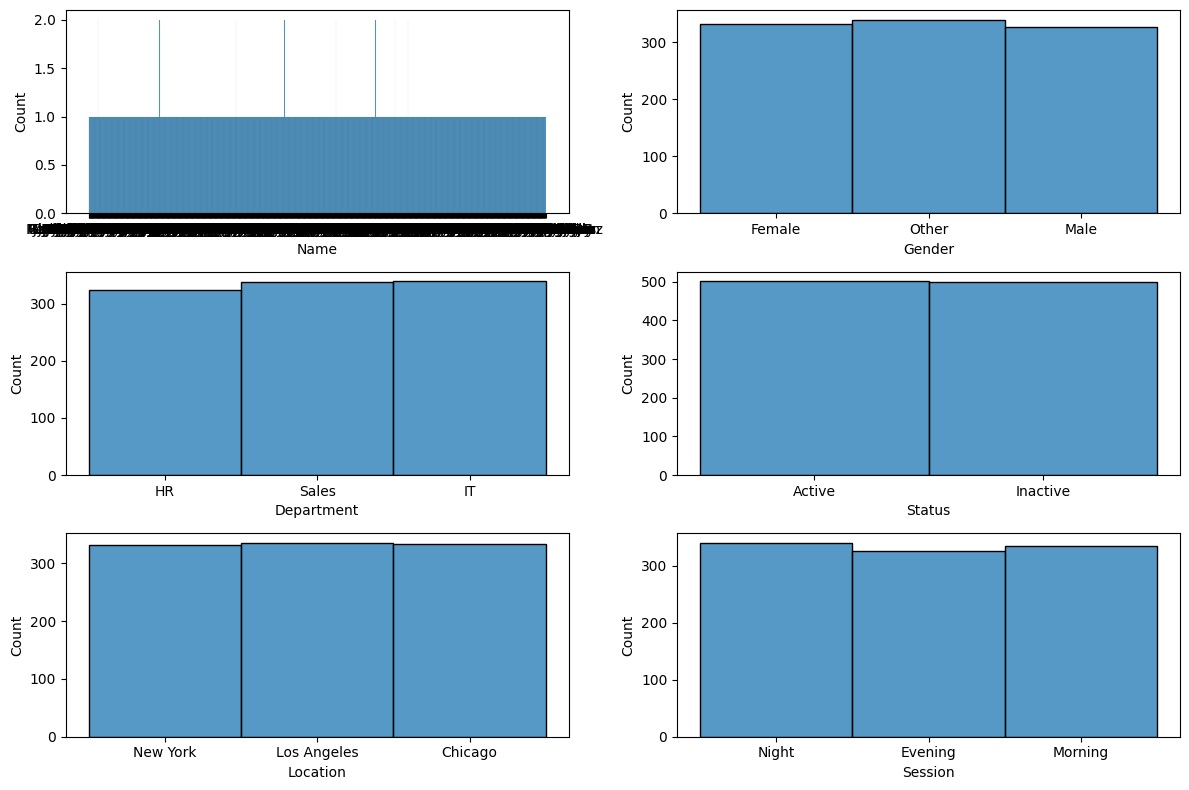

In [33]:
cats = df.select_dtypes(include = 'object').columns
plt.figure(figsize = (12,8))
for i, col in enumerate(cats):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col])
plt.tight_layout()
plt.show()

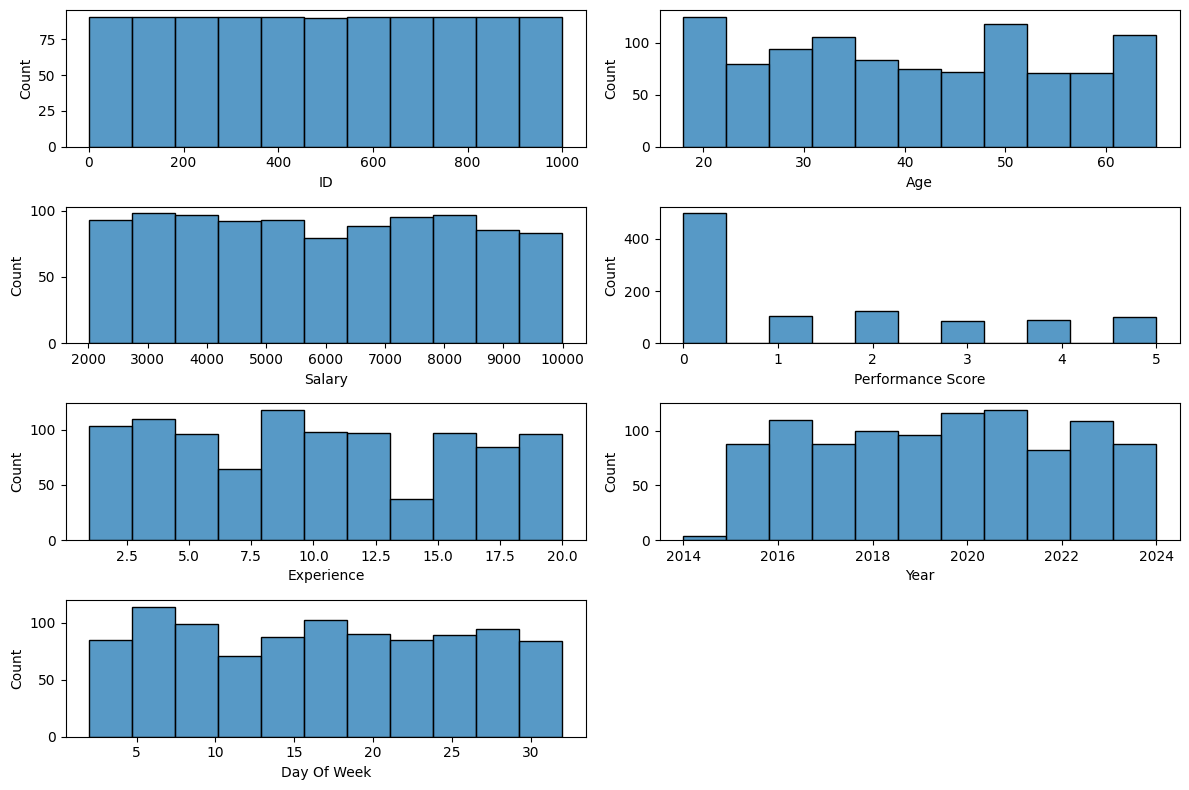

In [34]:
nums = df.select_dtypes(include = 'number').columns
plt.figure(figsize = (12,8))
for i, col in enumerate(nums):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df)

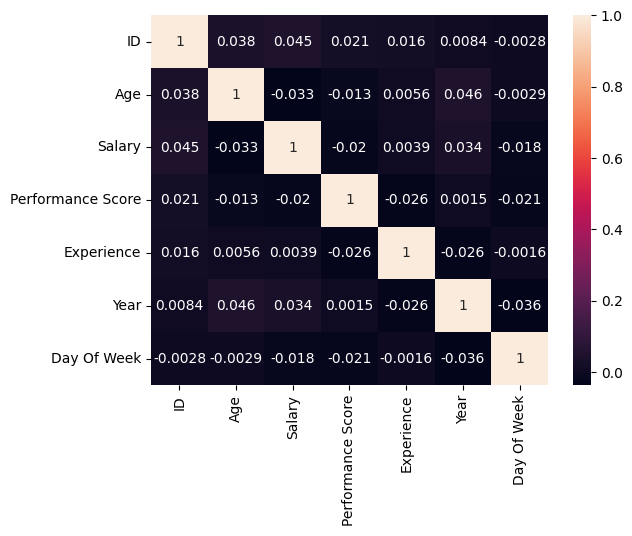

In [36]:
correlation = df.select_dtypes(include = 'number').corr()
sns.heatmap(correlation, annot = True)

## Insight

<Axes: xlabel='Department'>

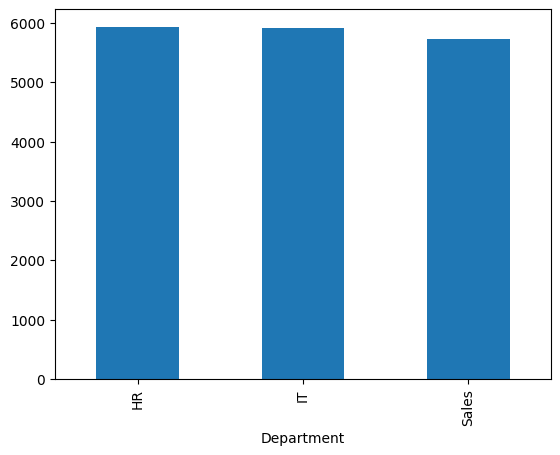

In [37]:
# What is the average salary of departments from employee that have an 'Active' Status
df.query("Status == 'Active'") \
.groupby('Department')['Salary'].mean() \
.plot(kind = 'bar')

<Axes: xlabel='Session,Gender'>

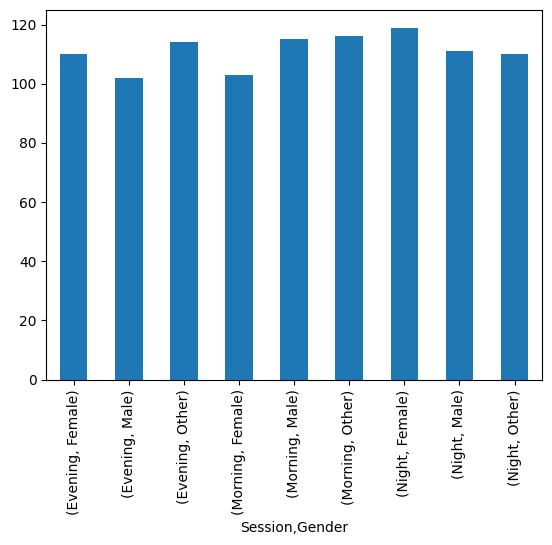

In [38]:
# How many people work in sessions with gender distribution
df.groupby(['Session', 'Gender'])['Gender'] \
.agg('count') \
.plot(kind = 'bar')

<Axes: xlabel='Year', ylabel='Counts'>

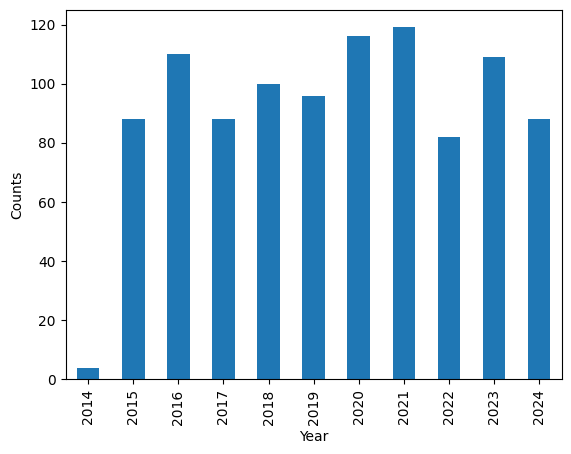

In [39]:
# How Many People Join The Company Every Year
df.groupby('Year')['ID'].count() \
.plot(kind = 'bar', xlabel = "Year", ylabel = "Counts")

<Axes: xlabel='Department'>

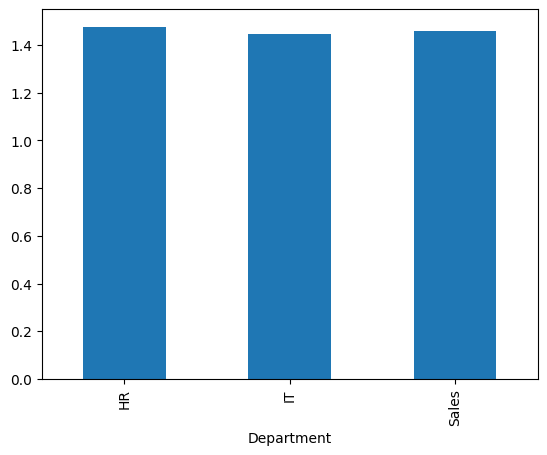

In [40]:
# What is the average perfomance score of every deparment
df.groupby('Department')['Performance Score'].mean() \
.plot(kind = 'bar')

<Axes: xlabel='Year'>

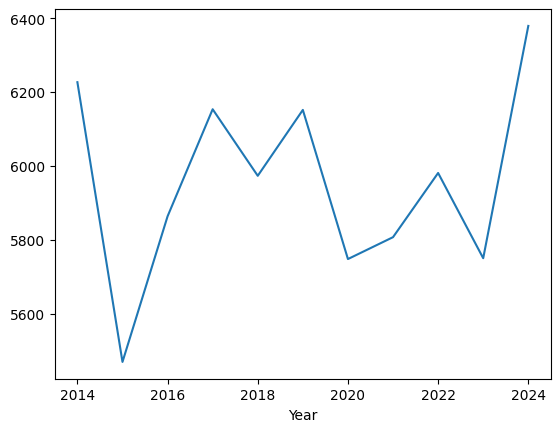

In [41]:
# Is Salary Improving Every Year
df.groupby('Year')['Salary'].mean() \
.plot()

<Axes: xlabel='Location'>

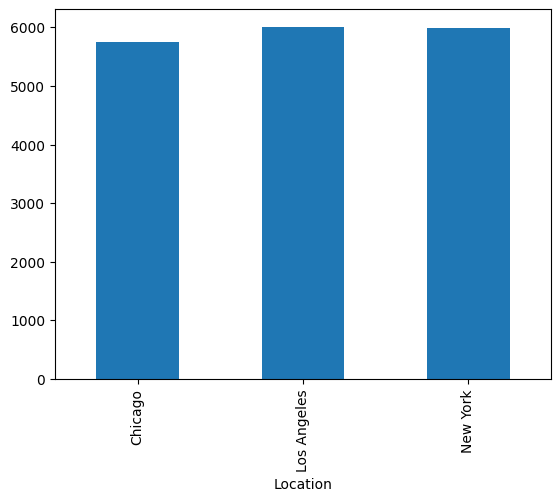

In [42]:
# Is Salary Different Across Location
df.groupby('Location')['Salary'].mean() \
.plot(kind = 'bar')